In [109]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

In [110]:
#Take the fits file to pandas for the analysis code
with fits.open(r"C:\Users\clauw\Documents\Programming\Final-Project\Spatial range\solarspectrum_mu1.fits") as hdul:
    tabla = hdul[0].data

table = pd.DataFrame(tabla)

In [111]:
# #Create the dataframe
raw_data = pd.DataFrame()
raw_data['Wave A'] = np.array(table.iloc[0].tolist())
raw_data['nFlux'] = np.array(table.iloc[1].tolist())
raw_data


,Wave A,nFlux
0,4200.000,0.873086
1,4200.001,0.875943
2,4200.002,0.879616
3,4200.003,0.884252
4,4200.004,0.887163
...,...,...
3799996,7999.996,0.974642
3799997,7999.997,0.974583
3799998,7999.998,0.974533
3799999,7999.999,0.974483


In [112]:
#Lines from the excel
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visible range\valores vacio Nave.xlsx", skiprows=10, usecols=[0], names=['Nave list'])
raw_lambda

,Nave list
0,4060.8601
1,4068.4198
2,4080.9899
3,4086.1573
4,4088.2476
...,...
614,10425.8870
615,10426.6020
616,10535.1220
617,10580.0390


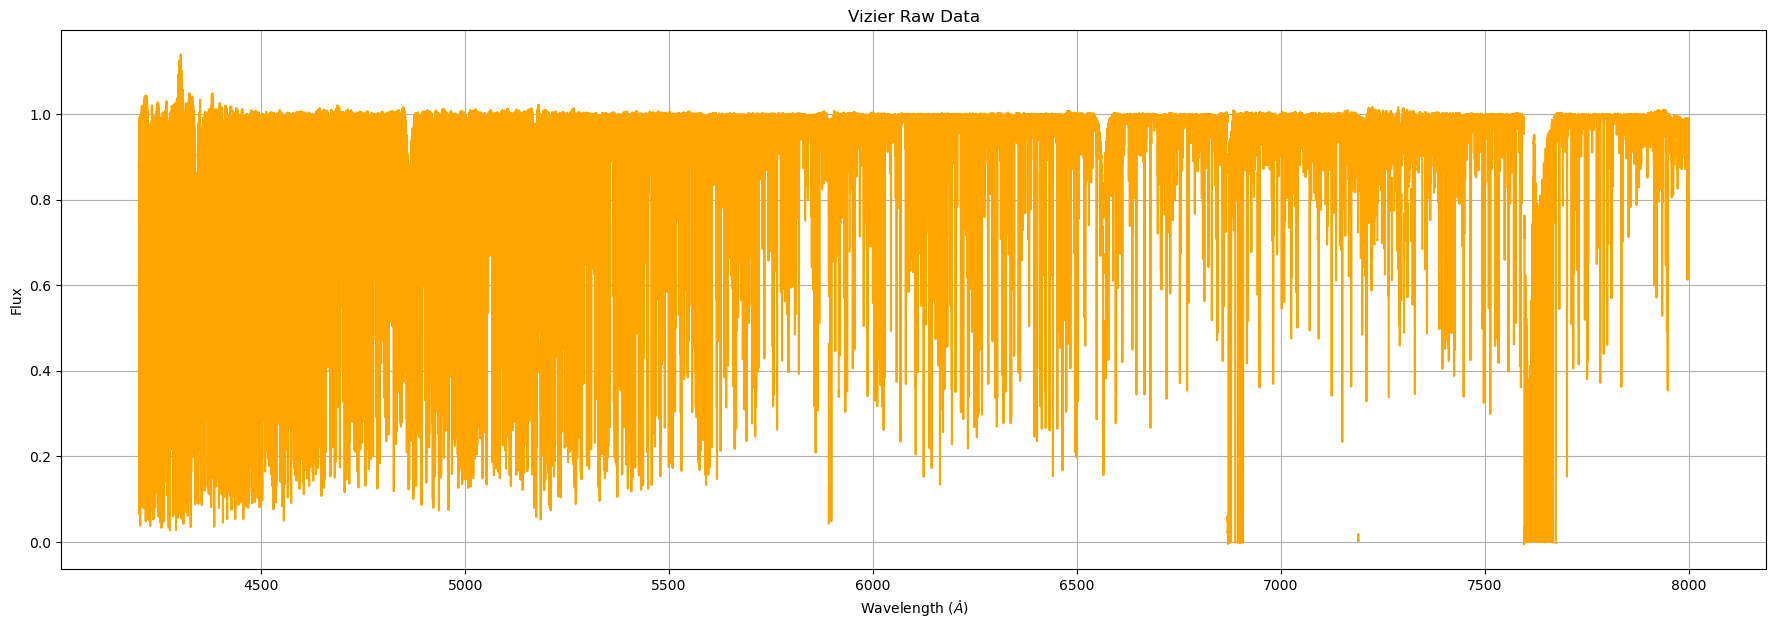

In [113]:
fig, ax = plt.subplots(1,1,figsize=(22,7))
ax.plot(raw_data['Wave A'],raw_data['nFlux'], color='orange')
ax.set_title('Vizier Raw Data')
ax.set_xlabel(r'Wavelength $(\mathring{A})$')
ax.set_ylabel('Flux')
ax.grid()

### Wavelength classification

In [114]:
#between work like < or > but not the equal, reset the index for the other functions
data_4000_5000 = raw_data[raw_data['Wave A'].between(4000, 5000, inclusive='neither')].reset_index(drop=True)
data_5000_6000 = raw_data[raw_data['Wave A'].between(5000, 6000, inclusive='neither')].reset_index(drop=True)
data_6000_7000 = raw_data[raw_data['Wave A'].between(6000, 7000, inclusive='neither')].reset_index(drop=True)
data_7000_8000 = raw_data[raw_data['Wave A'].between(7000, 8000, inclusive='neither')].reset_index(drop=True)

data_5000_6000

,Wave A,nFlux
0,5000.001,0.990062
1,5000.002,0.990149
2,5000.003,0.990468
3,5000.004,0.990989
4,5000.005,0.991496
...,...,...
999994,5999.995,0.987998
999995,5999.996,0.988049
999996,5999.997,0.988010
999997,5999.998,0.987693


In [115]:
#Now from lambda
lambda_4000_5000 = raw_lambda[raw_lambda['Nave list'].between(4000, 5000, inclusive='neither')].reset_index(drop=True)
lambda_5000_6000 = raw_lambda[raw_lambda['Nave list'].between(5000, 6000, inclusive='neither')].reset_index(drop=True)
lambda_6000_7000 = raw_lambda[raw_lambda['Nave list'].between(6000, 7000, inclusive='neither')].reset_index(drop=True)
lambda_7000_8000 = raw_lambda[raw_lambda['Nave list'].between(7000, 8000, inclusive='neither')].reset_index(drop=True)

lambda_4000_5000

,Nave list
0,4060.8601
1,4068.4198
2,4080.9899
3,4086.1573
4,4088.2476
...,...
141,4986.9382
142,4987.6138
143,4990.3419
144,4992.6608


### Find the minimums and the closer line of the Fe I line


In [116]:
#Find the minimum or the lambda in the spectrum
def find_minimums(wave,flux,lamda):
    #The function find_peaks just got the index of the points
    #The minus if for the minimums, without it are the maximums
    minimums,_ = find_peaks(-flux) 
    mindf = pd.DataFrame([]) #Make a dataframe
    mindf['min_wave'] = wave[minimums]
    mindf['min_flux'] = flux[minimums]

    #Take the closer line with the absolute value of the difference between the minimums and the line
    #This step dont include the closer points that are not minimums
    closer = []
    for each in lamda:
        mindf['abs'] = np.abs(mindf['min_wave']-each)
        closer.append(mindf.loc[mindf['abs'] == min(mindf['abs'])]) #take all the row

    #Dataframe with the marks for the closer lines of Fe
    closer_data = pd.concat(closer,axis=0).reset_index(drop=True)
    closer_data['Fe line'] = lamda
    closer_data = closer_data[closer_data['abs'] <= 0.025].reset_index(drop=True)

    return closer_data.drop(['abs'],axis=1)

closer_lines_4000_5000= find_minimums(data_4000_5000['Wave A'],data_4000_5000['nFlux'],lambda_4000_5000['Nave list'])
closer_lines_5000_6000 = find_minimums(data_5000_6000['Wave A'],data_5000_6000['nFlux'],lambda_5000_6000['Nave list'])
closer_lines_6000_7000 = find_minimums(data_6000_7000['Wave A'],data_6000_7000['nFlux'],lambda_6000_7000['Nave list'])
closer_lines_7000_8000 = find_minimums(data_7000_8000['Wave A'],data_7000_8000['nFlux'],lambda_7000_8000['Nave list'])

closer_lines_4000_5000


,min_wave,min_flux,Fe line
0,4202.108,0.125291,4202.1078
1,4203.938,0.246928,4203.9370
2,4206.723,0.175480,4206.7233
3,4208.320,0.112591,4208.3123
4,4209.786,0.132820,4209.7896
...,...,...,...
114,4986.946,0.174043,4986.9382
115,4987.619,0.449507,4987.6138
116,4990.349,0.224028,4990.3419
117,4992.670,0.230517,4992.6608


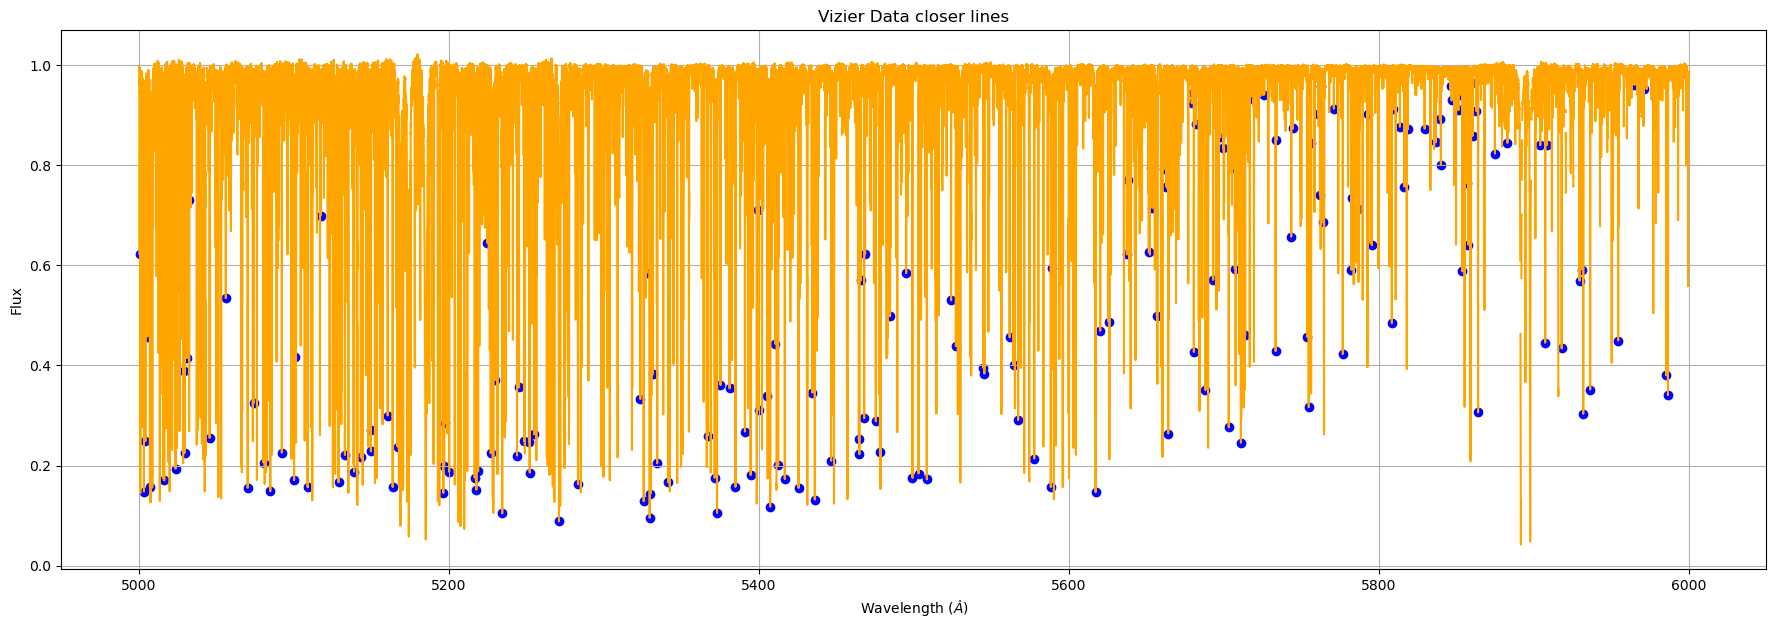

In [117]:
fig3, ax = plt.subplots(1,1,figsize=(22,7))
ax.plot(data_5000_6000['Wave A'],data_5000_6000['nFlux'], color='orange')
ax.scatter(closer_lines_5000_6000['min_wave'],closer_lines_5000_6000['min_flux'], color='blue')
ax.set_title('Vizier Data closer lines')
ax.set_xlabel(r'Wavelength $(\mathring{A})$')
ax.set_ylabel('Flux')
ax.grid()

In [118]:
#Localize the line and save the width for lines
def width_minimums(closer_lines,data,width):
    local_points =[]
    for each in closer_lines['min_wave']:
        #This append all the part of the dataframe in that range
        local_points.append(data[data['Wave A'].between(each-width, each+width, inclusive='neither')])

    return local_points

#Data
local_points_4000_5000 = width_minimums(closer_lines_4000_5000,data_4000_5000,0.05)
local_points_5000_6000 = width_minimums(closer_lines_5000_6000,data_5000_6000,0.05)
local_points_6000_7000 = width_minimums(closer_lines_6000_7000,data_6000_7000,0.05)
local_points_7000_8000 = width_minimums(closer_lines_7000_8000,data_7000_8000,0.05)

local_points_5000_6000

[       Wave A     nFlux
 459  5000.460  0.887464
 460  5000.461  0.882301
 461  5000.462  0.876985
 462  5000.463  0.871572
 463  5000.464  0.866185
 ..        ...       ...
 553  5000.554  0.852764
 554  5000.555  0.857949
 555  5000.556  0.862991
 556  5000.557  0.867610
 557  5000.558  0.871892
 
 [99 rows x 2 columns],
         Wave A     nFlux
 3218  5003.219  0.373941
 3219  5003.220  0.365905
 3220  5003.221  0.357762
 3221  5003.222  0.349706
 3222  5003.223  0.341601
 ...        ...       ...
 3312  5003.313  0.395897
 3313  5003.314  0.406165
 3314  5003.315  0.416388
 3315  5003.316  0.426401
 3316  5003.317  0.436596
 
 [99 rows x 2 columns],
         Wave A     nFlux
 4146  5004.147  0.600905
 4147  5004.148  0.590629
 4148  5004.149  0.580459
 4149  5004.150  0.570332
 4150  5004.151  0.560288
 ...        ...       ...
 4240  5004.241  0.638053
 4241  5004.242  0.648064
 4242  5004.243  0.657946
 4243  5004.244  0.667813
 4244  5004.245  0.677432
 
 [99 rows x 2 columns]

### Derivates and fit

In [119]:
def Fit_derivates(local_points,lamda_list):
    values = []
    fit = []

    for i in range(0,len(local_points)):

        data_wave, data_flux = local_points[i]['Wave A'], local_points[i]['nFlux'] #The index i correspond at one line in the lambda_list of lines 

        #Internal rise, with the mean and std just for the big data (wavenumber)
        wave_mean, wave_std = np.mean(data_wave), np.std(data_wave) 
        wave_scaled = (data_wave - wave_mean)/wave_std if wave_std != 0 else data_wave #take the conditional for the division

        #Polynomial Fit is better for numerical aproximation than polyfit
        pol = Polynomial.fit(wave_scaled, data_flux, 4)

        #Scaled coeficients of fit
        param = pol.convert().coef

        #Calculate the derivates without evaluate the point, polyder takes the derivate of the polinomium
        d_param = poly.polyder(param) #First
        d2_param = poly.polyder(d_param) #Second
        d3_param = poly.polyder(d2_param) #Third

        #The fit values
        flux_fit = poly.polyval(wave_scaled,param)

        #Find the minimum with the regression and derivates
        roots = poly.polyroots(d_param).real #roots or critical points
        valid_roots = np.array([x for x in roots if poly.polyval(x,d2_param)>0] )#check with the second derivate, just positive values for minimums
        
        if valid_roots.size >0:
            value_roots = pol(valid_roots) #evaluate in the polinomium for the global minimum
            minimal_root = valid_roots[np.where(value_roots == min(value_roots))][0] , min(value_roots) #take the values

            #For the lambda convert the minimal root in wave with the scale of the mean, we dont scale the flux data
            lamda_obs = [round(minimal_root[0]*wave_std + wave_mean,4), minimal_root[1]]

            #Evaluate the second and third derivate in the lambda observed
            #Formula for the third derivate
            def Third_Derivate(second, third):
                return -((third)/(3*(second**2)))

            d2 = poly.polyval(minimal_root[0],d2_param) / (wave_std ** 2) #Re-scalated the coefficients
            d3 = Third_Derivate(d2, poly.polyval(minimal_root[0],d3_param) / (wave_std ** 3) ) 

            #Calculate the velocity and convective blueshift
            blueshift = ((lamda_obs[0]/lamda_list[i]) - 1)* const.c
            velocity = round((blueshift) - 633) #Formula for relativistic aproximation

    
            values.append(pd.DataFrame([[lamda_list[i],lamda_obs[0],lamda_obs[1],velocity,d2,d3,blueshift]])) #natural lambda, observed lambda, flux, velocity, second derivate, third derivate

            fit.append(flux_fit)

    Values =  pd.concat(values,axis=0).reset_index(drop=True)

    Values.columns = ["Lambda natural", "Lambda observed", "Flux",'Velocity','2nd Derivate','3rd Derivate','Blueshift']


    return Values

Values_4000_5000 = Fit_derivates(local_points_4000_5000,closer_lines_4000_5000['Fe line'])
Values_5000_6000 = Fit_derivates(local_points_5000_6000,closer_lines_5000_6000['Fe line'])
Values_6000_7000 = Fit_derivates(local_points_6000_7000,closer_lines_6000_7000['Fe line'])
Values_7000_8000 = Fit_derivates(local_points_7000_8000,closer_lines_7000_8000['Fe line'])
Values_4000_5000


,Lambda natural,Lambda observed,Flux,Velocity,2nd Derivate,3rd Derivate,Blueshift
0,4202.1078,4202.1137,0.120261,-212,450.608527,-0.007901,420.925780
1,4203.9370,4203.9391,0.251287,-483,762.620438,-0.000098,149.755851
2,4206.7233,4206.7272,0.169646,-355,539.903829,-0.004571,277.933799
3,4208.3123,4208.3170,0.111958,-298,569.211042,-0.003034,334.819389
4,4209.7896,4209.7963,0.124643,-156,440.141820,-0.015964,477.128232
...,...,...,...,...,...,...,...
114,4986.9382,4985.3900,-308.649324,-93704,1820.445963,0.000508,-93070.871316
115,4987.6138,4987.6176,0.453740,-405,505.044951,-0.000640,228.408090
116,4990.3419,4990.3485,0.221842,-237,447.559653,-0.003874,396.491916
117,4992.6608,4992.6675,0.227579,-231,438.728235,-0.003798,402.312424


In [120]:
# import tkinter as tk
# from tkinter import ttk
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
# import numpy as np

# class OutlierViewer:
#     def __init__(self, root, local_points, closer_line):
#         self.root = root
#         self.root.title("Visualizador Interactivo")
#         self.local_points = local_points
#         self.closer_line = closer_line
#         self.index = closer_line.index.values
#         self.current_index = 0
       
#         self.setup_ui()
#         self.update_plot()
    
#     def setup_ui(self):
#         main_frame = ttk.Frame(self.root, padding="10")
#         main_frame.pack(fill=tk.BOTH, expand=True)
        
#         control_frame = ttk.Frame(main_frame)
#         control_frame.pack(fill=tk.X, pady=10)
        
#         ttk.Label(control_frame, text="Índice de Outlier:").pack(side=tk.LEFT, padx=5)
#         self.slider = ttk.Scale(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             orient=tk.HORIZONTAL,
#             command=self.on_slider_move
#         )
#         self.slider.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=5)
        
#         self.spinbox = ttk.Spinbox(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             width=5,
#             command=self.on_spinbox_change
#         )
#         self.spinbox.pack(side=tk.LEFT, padx=5)
#         self.spinbox.bind("<Return>", self.on_spinbox_change)
        
#         nav_frame = ttk.Frame(control_frame)
#         nav_frame.pack(side=tk.LEFT, padx=10)
        
#         ttk.Button(nav_frame, text="← Anterior", command=self.prev_plot).pack(side=tk.LEFT)
#         ttk.Button(nav_frame, text="Siguiente →", command=self.next_plot).pack(side=tk.LEFT, padx=5)
     
#         graph_frame = ttk.Frame(main_frame)
#         graph_frame.pack(fill=tk.BOTH, expand=True)
       
#         self.fig, self.ax = plt.subplots(figsize=(10, 6))
#         self.canvas = FigureCanvasTkAgg(self.fig, master=graph_frame)
#         self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
#         self.toolbar = NavigationToolbar2Tk(self.canvas, graph_frame)
#         self.toolbar.update()
#         self.canvas._tkcanvas.pack(fill=tk.BOTH, expand=True)
    
#     def on_slider_move(self, event=None):
#         self.current_index = int(float(self.slider.get()))
#         self.spinbox.delete(0, tk.END)
#         self.spinbox.insert(0, str(self.current_index))
#         self.update_plot()
    
#     def on_spinbox_change(self, event=None):
#         try:
#             new_index = int(self.spinbox.get())
#             if 0 <= new_index < len(self.index):
#                 self.current_index = new_index
#                 self.slider.set(self.current_index)
#                 self.update_plot()
#         except ValueError:
#             pass
    
#     def prev_plot(self):
#         if self.current_index > 0:
#             self.current_index -= 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     def next_plot(self):
#         if self.current_index < len(self.index)-1:
#             self.current_index += 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     #Graficas
#     def update_plot(self):
#         j = self.current_index
#         self.ax.clear()
        
#         # Gráfica principal
#         self.ax.plot(
#             self.local_points[j]['Wave A'],
#             self.local_points[j]['nFlux'],
#             color='orange',
#             label='Spectrum'
#         )
        
#         #Closer lines
#         self.ax.scatter(
#             self.closer_line['min_wave'][j],
#             self.closer_line['min_flux'][j],
#             color='blue',
#             label='Minimum',
#             s = 100,
#         )
        
#         #Puntos de la lista de Fe
#         self.ax.scatter(
#             self.closer_line['Fe line'][j],
#             self.closer_line['min_flux'][j],
#             color='red',
#             label='Fe line',
#             s=100
#         )

        
        
#         #Vainitas del gráfico
#         self.ax.set_title(f'Visualizer - Index {self.index[j]}')
#         self.ax.set_xlabel(r'Wavelength $(\mathring{A})$')
#         self.ax.set_ylabel('Flux')
#         self.ax.legend()
#         self.ax.grid(True)
        
#         self.canvas.draw()


# if __name__ == "__main__":
#     root = tk.Tk()
#     root.geometry("900x700")

#     app = OutlierViewer(root, local_points_5000_6000, closer_lines_5000_6000)

#     root.mainloop()

## Visualizer for Fe lines with the fit

In [121]:
Values = pd.concat([Values_4000_5000, Values_5000_6000, Values_6000_7000, Values_7000_8000],axis=0).reset_index(drop=True)
Values = Values[Values['Flux']>0]
Values

,Lambda natural,Lambda observed,Flux,Velocity,2nd Derivate,3rd Derivate,Blueshift
0,4202.1078,4202.1137,0.120261,-212,450.608527,-0.007901,420.925780
1,4203.9370,4203.9391,0.251287,-483,762.620438,-0.000098,149.755851
2,4206.7233,4206.7272,0.169646,-355,539.903829,-0.004571,277.933799
3,4208.3123,4208.3170,0.111958,-298,569.211042,-0.003034,334.819389
4,4209.7896,4209.7963,0.124643,-156,440.141820,-0.015964,477.128232
...,...,...,...,...,...,...,...
474,7915.0437,7915.0519,0.600122,-322,208.280531,-0.003822,310.585544
475,7943.2736,7943.2820,0.646910,-316,177.644139,-0.000265,317.030078
476,7948.0326,7948.0484,0.353683,-37,98.071149,-0.019203,595.961425
477,7957.1226,7957.1302,0.929205,-347,37.795244,0.027460,286.337511


In [ ]:
# #Convert to excel
# Values.to_excel('valores_Spatial.xlsx', index=False)

In [123]:

#separate for color range, make a list
values_colors = [ Values[Values['Lambda observed'].between(3800, 4270, inclusive='neither')],
                 Values[Values['Lambda observed'].between(4270, 4760, inclusive='neither')],
                 Values[Values['Lambda observed'].between(4760, 4970, inclusive='neither')],
                 Values[Values['Lambda observed'].between(4970, 5700, inclusive='neither')],
                 Values[Values['Lambda observed'].between(5700, 5810, inclusive='neither')],
                 Values[Values['Lambda observed'].between(5810, 6180, inclusive='neither')],
                 Values[Values['Lambda observed'].between(6180, 7800, inclusive='neither')],
                 Values[Values['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

### Graphics 

In [124]:
#colors for the plot
colors = ['violet','blue','cyan','green','yellow','orange','red','brown']

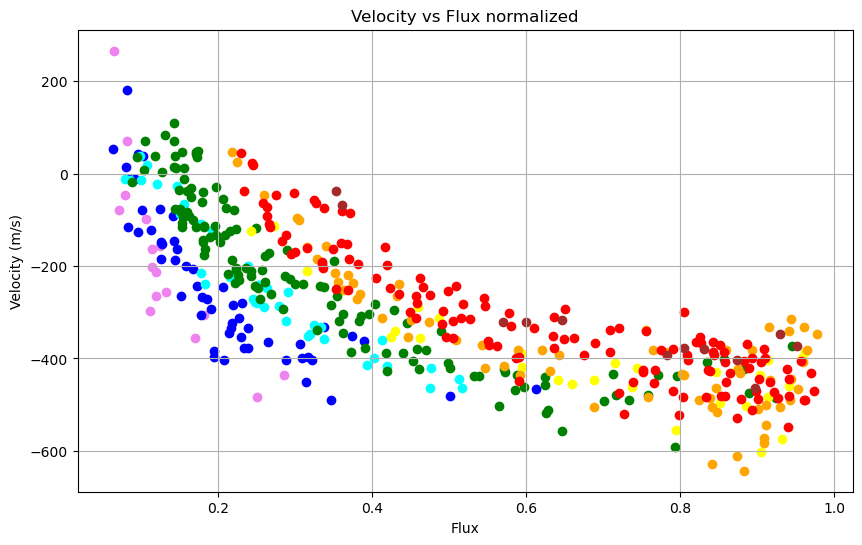

In [ ]:
#Velocity vs Flux 
fig5, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_colors)):  
    ax.scatter(values_colors[i]['Flux'],values_colors[i]['Velocity'], c=colors[i])

ax.set_title('Velocity vs Flux normalized')
ax.set_xlabel(r'Flux')
ax.set_ylabel('Velocity (m/s)')

ax.grid()
# fig5.savefig('Velocity.png')

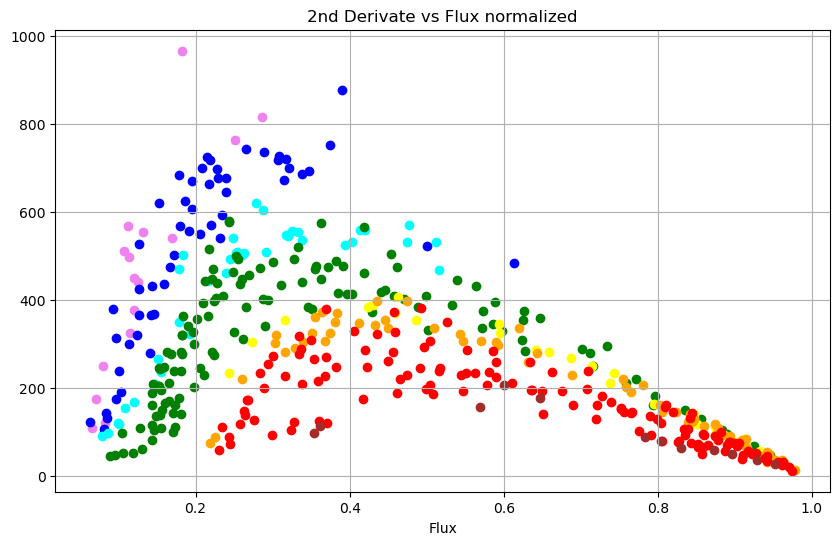

In [ ]:
#2nd Derivate vs Flux
fig6, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_colors)):  
    ax.scatter(values_colors[i]['Flux'],values_colors[i]['2nd Derivate'], color=colors[i])

ax.set_title('2nd Derivate vs Flux normalized')
ax.set_xlabel(r'Flux')
ax.grid()
# fig6.savefig('2Derivate.png')

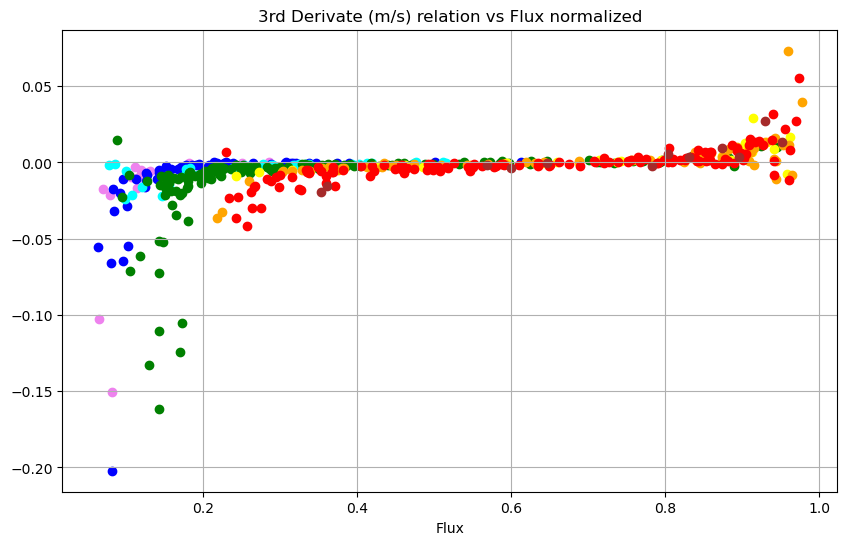

In [ ]:
#3rd Derivate vs Flux
fig7, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_colors)):  
    ax.scatter(values_colors[i]['Flux'],values_colors[i]['3rd Derivate'], color=colors[i])

ax.set_title(r'3rd Derivate (m/s) relation vs Flux normalized')
ax.set_xlabel(r'Flux')
ax.grid()
# fig7.savefig('3Derivate.png')

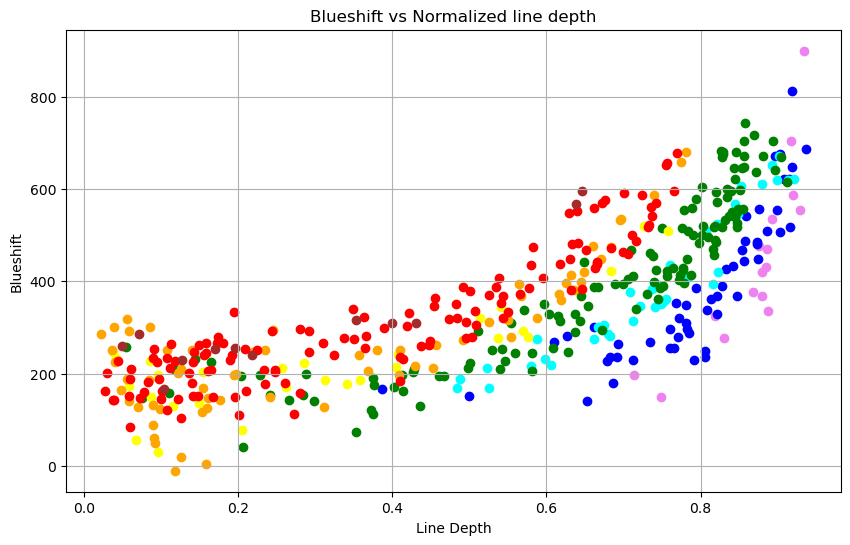

In [ ]:
#Granulation pattern
fig8, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_colors)):  
    ax.scatter(1-values_colors[i]['Flux'],values_colors[i]['Blueshift'], color=colors[i])

ax.set_title('Blueshift vs Normalized line depth')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# fig8.savefig('Blueshift.png')